In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean, stdev, median
import plotting_config
import seaborn as sns
import glob
sns.set_style("whitegrid")
color_map = {"curve_A": "#eb3423", "curve_B": "#1501f4", "curve_C":"#367d22"}


In [3]:
def get_best_run(dfs):
    best_seed_idx = None
    best_seed_avg_dist = None
    best_std_dist_all = None 
    
    for idx, d in enumerate(dfs):
        avg_dist_all = sum(d['distance']) / len(d['distance'])
        if best_seed_idx is None or best_seed_avg_dist > avg_dist_all:
            best_seed_idx = idx
            best_seed_avg_dist = avg_dist_all
            best_std_dist_all = stdev(d['distance'])


    d = dfs[best_seed_idx]
    tmp = d[d['name'] == "curve_A"]
    mean_a = sum(tmp['distance']) / len(tmp['distance'])
    tmp = d[d['name'] == "curve_B"]
    mean_b = sum(tmp['distance']) / len(tmp['distance'])
    tmp = d[d['name'] == "curve_C"]
    mean_c = sum(tmp['distance']) / len(tmp['distance'])
    
    return best_seed_idx, best_seed_avg_dist, best_std_dist_all, mean_a, mean_b, mean_c


['bc_curve/lr5/bc_S3_A2_128#128#lr5.csv', 'bc_curve/lr5/bc_S3_A2_64#12#5lr.csv', 'bc_curve/lr5/bc_S3_A2_256#128#64#5lr.csv']
bc_curve/lr5/bc_S3_A2_128#128#lr5.csv idx:bc_curve/lr5/bc_S3_A2_128#128#lr5.csv  best seed: 0 best_seed_avg: 30.137804323642534 best_seed_std: 46.57219250147053  a:29.982620979079986 b:6.467942753234188 c:49.33676974465265
29.982620979079986


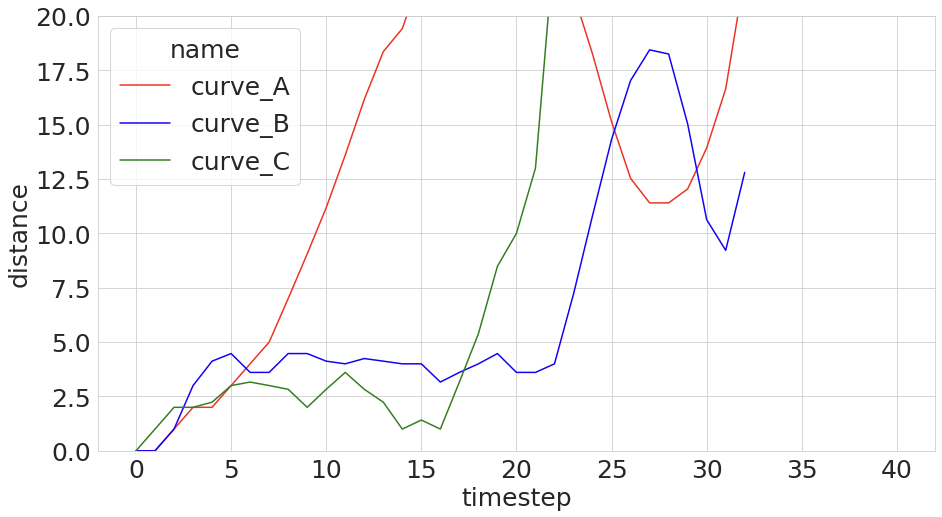

bc_curve/lr5/bc_S3_A2_64#12#5lr.csv idx:bc_curve/lr5/bc_S3_A2_64#12#5lr.csv  best seed: 0 best_seed_avg: 20.628016637187734 best_seed_std: 34.859641657473716  a:42.778333530542035 b:8.505048529866071 c:9.315713922573014
42.778333530542035


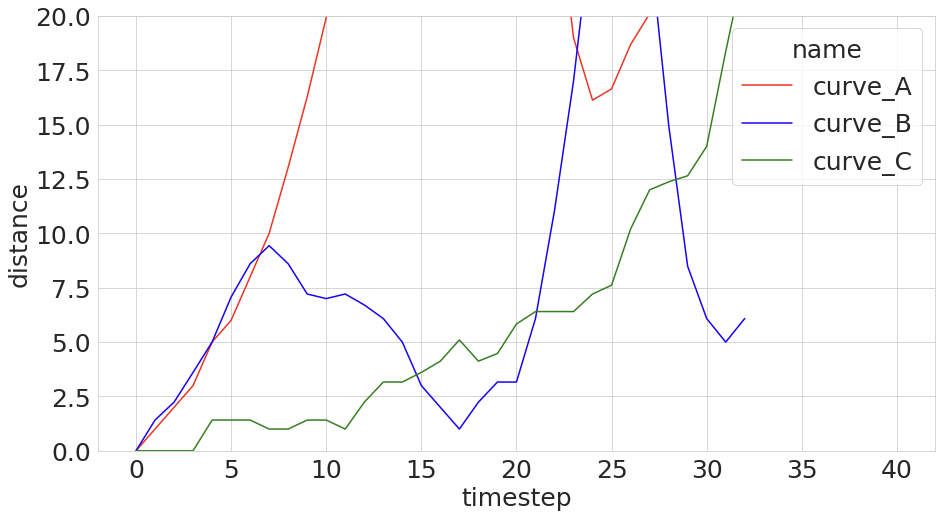

bc_curve/lr5/bc_S3_A2_256#128#64#5lr.csv idx:bc_curve/lr5/bc_S3_A2_256#128#64#5lr.csv  best seed: 0 best_seed_avg: 2.921004674914836 best_seed_std: 2.2890532994621564  a:2.201172947063545 b:3.5183466989202223 c:3.124935177208069
2.201172947063545


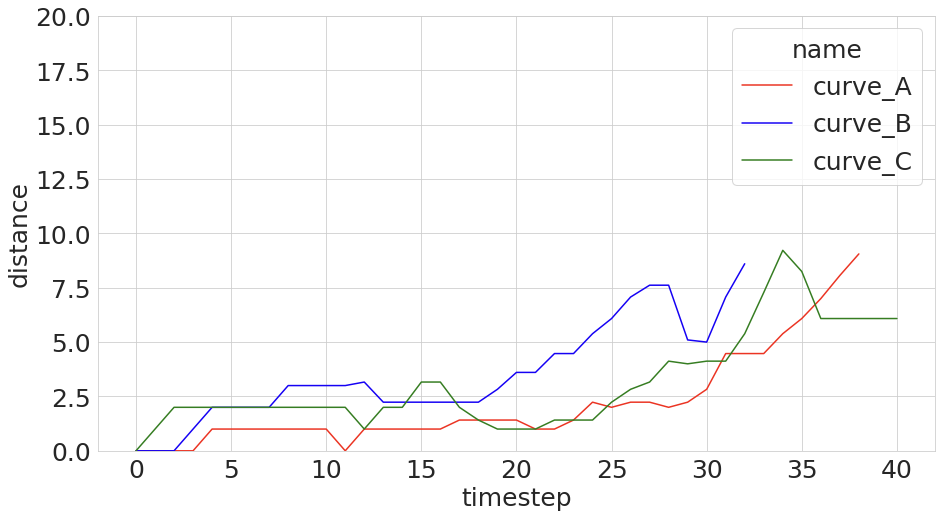

In [9]:
#folder = 'ddpg_curve_sigma05_l3_tau4_batch_64/'
folder = 'ddpg_curve_sigma005_l4_tau3_batch_128/'
folder = ''
#prefix_list = ['ddpg_S3_A2_R2#ß.csv', 'ddpg_S4_A2_R2#ß.csv', 'ddpg_S5_A2_R2#ß.csv']
prefix_list = ['ddpg_S4_A2_R2#ß.csv', 'ddpg_S4_A2_R3#ß.csv']
prefix_list = glob.glob('bc_curve/lr5/*.csv')
print(prefix_list)
#'ddpg_S2_A1_R2#ß.csv', 
plt.rc('font', family='Helvetica')

SMALL_SIZE = 25
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


for prefix in prefix_list:
    all_files = []
    all_files.append(folder + prefix.replace('ß', '5'))
    all_files.append(folder + prefix.replace('ß', '6'))
    all_files.append(folder + prefix.replace('ß', '7'))
    all_files.append(folder + prefix.replace('ß', '8'))
    all_files.append(folder + prefix.replace('ß', '9'))

    dfs = []
    for f in all_files:
        dfs.append(pd.read_csv(f))

    df = pd.concat((d for d in dfs), ignore_index=True)
    best_seed_idx, best_seed_avg, best_std_dist_all, mean_a, mean_b, mean_c = get_best_run(dfs)
    

    print(f'{prefix} idx:{all_files[best_seed_idx]}  best seed: {best_seed_idx} best_seed_avg: {best_seed_avg} best_seed_std: {best_std_dist_all}  a:{mean_a} b:{mean_b} c:{mean_c}')
    
    bests = dfs[best_seed_idx]
    print(mean(bests[bests["name"] == "curve_A"]["distance"]))
    plt.figure(figsize=(15,8))
    p = sns.lineplot(data=bests, x="timestep", y="distance", hue="name", palette=color_map)
    plt.ylim(0, 20)
    plt.show()
    p.get_figure().savefig(prefix + "_K9" + ".png")
    p.get_figure().savefig(prefix + "_K9" + ".svg", format="svg")


In [123]:
best_a, euclid_a = get_best_run(dfs, "curve_A")
best_b, euclid_b = get_best_run(dfs, "curve_B")
best_c, euclid_c = get_best_run(dfs, "curve_C")

bests = pd.concat([best_a, best_b, best_c])

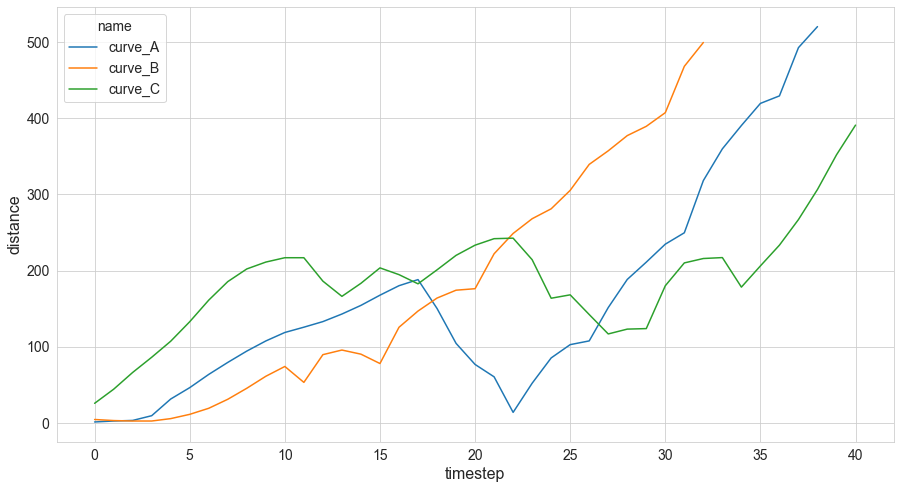

In [124]:
plt.figure(figsize=(15,8))
p = sns.lineplot(data=bests, x="timestep", y="distance", hue="name")
plt.show()

In [92]:
df

,id,timestep,distance,dtw,name
0,0,0,8.944272,8.944272,curve_A
1,0,1,17.492856,19.646883,curve_A
2,0,2,26.400758,32.908965,curve_A
3,0,3,33.941125,47.275787,curve_A
4,0,4,40.804412,62.449980,curve_A
...,...,...,...,...,...
560,2,36,140.071410,486.449381,curve_C
561,2,37,99.005050,383.469686,curve_C
562,2,38,59.816386,293.025596,curve_C
563,2,39,23.021729,245.766149,curve_C


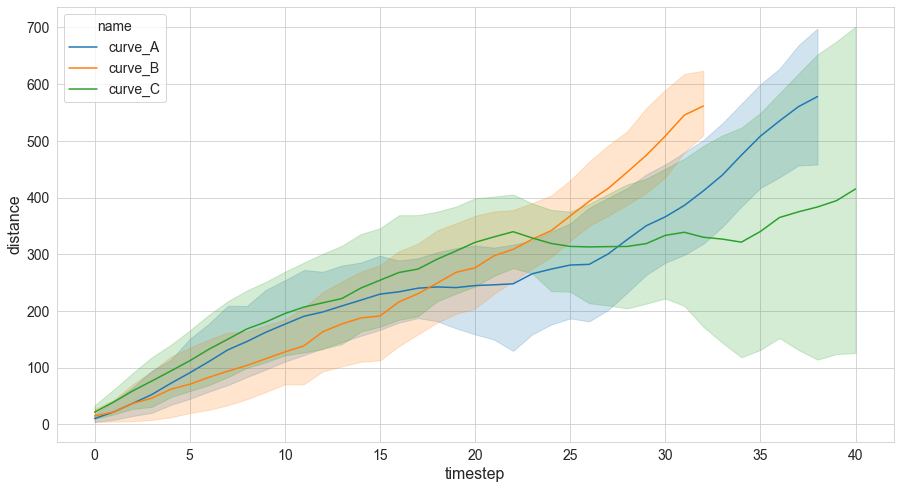

In [87]:
color_map = {"curve_A": "#eb3423", "curve_B": "#1501f4", "curve_C":"#367d22"}
plt.figure(figsize=(15,8))
p = sns.lineplot(data=df, x="timestep", y="distance", hue="name")
plt.show()
